1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

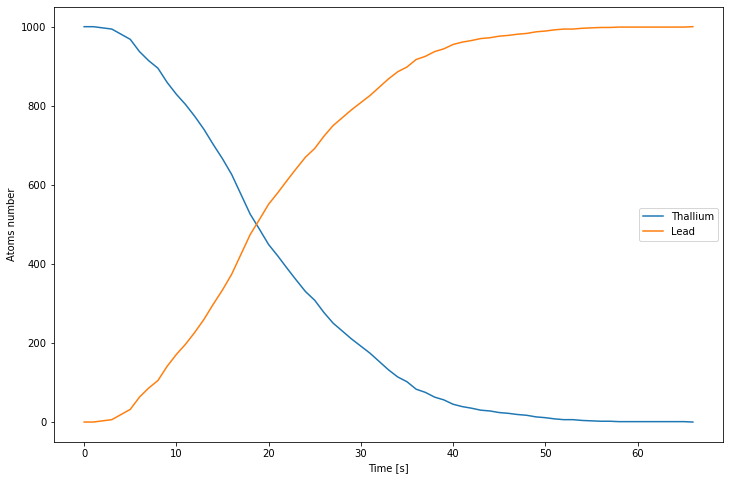

In [1]:
import numpy as np
import pandas as pd
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Question 1 Solution
tau = 3.052*60 
def decay_prob(t):
  return 1 - 2**(-t/tau)
thallium = [1000]
lead = [0]
seconds = 0
while thallium[-1] > 0:
  counter_th = thallium[-1]
  counter_ld = lead[-1]
  counter_decay = 0
  p_decay = decay_prob(seconds)
  for atom in range(counter_th):
    atom_p_decay = random.random()
    if atom_p_decay < p_decay:
      counter_decay += 1
  thallium.append(thallium[-1] - counter_decay)
  lead.append(lead[-1] + counter_decay)
  seconds += 1
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(thallium, label='Thallium')
ax.plot(lead, label='Lead')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Atoms number')
ax.legend()

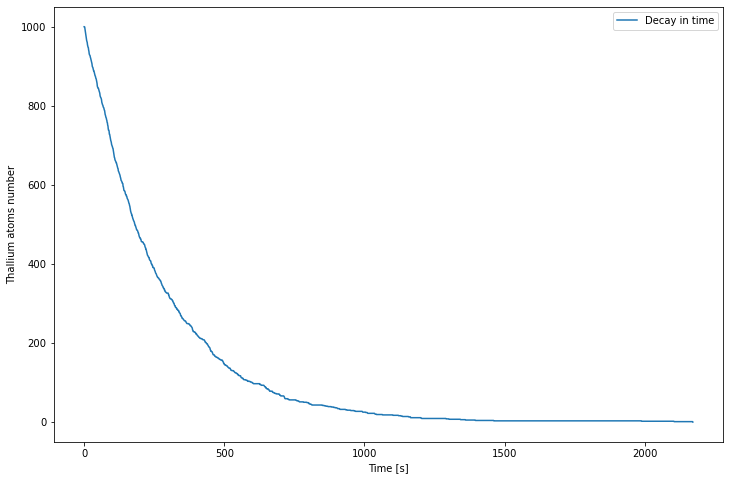

In [2]:
random.seed(235)
def icdf(y): # computed analytically
  return -tau * np.log2(1-y)
decay_times = []
for atom in range(1000):
  decay_times.append(icdf(random.random()))
decay_times = np.array(decay_times)
atoms_not_decayed = [1000]
num_decayed = 0
seconds = 0
while num_decayed < 1000:
  num_decayed = np.sum(decay_times < seconds)
  atoms_not_decayed.append(1000 - num_decayed)
  seconds += 1
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(atoms_not_decayed, label='Decay in time')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Thallium atoms number')
ax.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

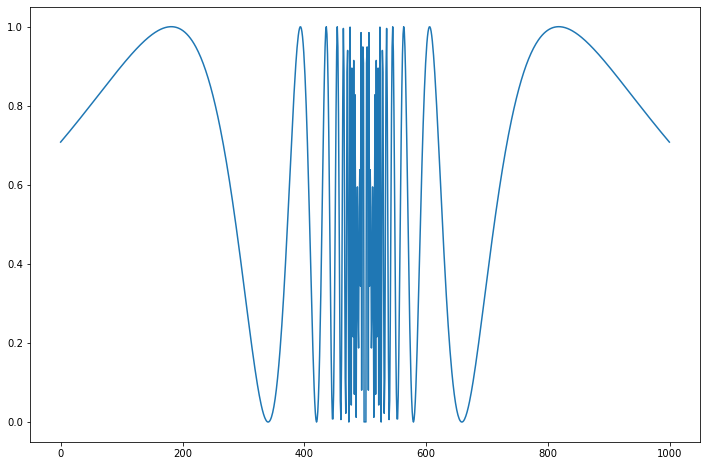

In [3]:
# Question 2 Solution
def f(x):
  return np.sin(1/(1-x))**2
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(f(np.linspace(0, 2, 1000)))

In [4]:
def hit_miss_integral(a, b, x):
  N = len(x)
  r = np.random.uniform(size=N)
  return ((b-a)/N) * np.sum(r < f(x))
N = 10000
a = 0
b = 2
I_hit_miss = []
for i in range(100):
  interval = np.random.uniform(low=a, high=b, size=N)
  I = hit_miss_integral(a, b, interval)
  I_hit_miss.append(I)
print("Mean: {:.5f}".format(np.mean(I_hit_miss)))
print("Error: {:.5f}".format(np.std(I_hit_miss)/np.sqrt(100)))

Mean: 1.34650
Error: 0.00093


In [5]:
def mean_val_integral(a, b, x):
  N = len(x)
  return ((b-a)/N) * np.sum(f(x))
N = 10000
a = 0
b = 2
I_mean_val = []
for i in range(100):
  interval = np.random.uniform(low=a, high=b, size=N)
  I = mean_val_integral(a, b, interval)
  I_mean_val.append(I)
print("Mean: {:.5f}".format(np.mean(I_mean_val)))
print("Error: {:.5f}".format(np.std(I_mean_val)/np.sqrt(100)))

Mean: 1.34653
Error: 0.00066


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [6]:
#Question 3 Solution
def f(X):
  norm = np.linalg.norm(X, axis=1)
  res = np.zeros(len(norm))
  res[norm <= 1] = 1
  return res
dim = 2
vol = 2**dim # volume of the hypercube
N = 100000
a = -1
b = 1
I_mean_val = []
for i in range(100):
  interval = np.random.uniform(low=a, high=b, size=(N, dim))
  I = vol * np.sum(f(interval))/N
  I_mean_val.append(I)
print("Mean: {:.5f}".format(np.mean(I_mean_val)))
print("Error: {:.5f}".format(np.std(I_mean_val)/np.sqrt(100)))

Mean: 3.14216
Error: 0.00057


In [7]:
def f(X):
  norm = np.linalg.norm(X, axis=1)
  res = np.zeros(len(norm))
  res[norm <= 1] = 1
  return res
dim = 10
vol = 2**dim # volume of the hypercube
N = 100000
a = -1
b = 1
I_mean_val = []
for i in range(100):
  interval = np.random.uniform(low=a, high=b, size=(N, dim))
  I = vol * np.sum(f(interval))/N
  I_mean_val.append(I)
print("Mean: {:.5f}".format(np.mean(I_mean_val)))
print("Error: {:.5f}".format(np.std(I_mean_val)/np.sqrt(100)))

Mean: 2.55918
Error: 0.01717


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
#Question 4 Solution
from scipy.integrate import quad
N = 10000
a = 0
b = 1
I_list = []
def f(x):
  return (x**(-.5))/(np.exp(x) + 1)
def w(x):
  return x**(-.5)
for i in range(100):
  x = np.random.uniform(low=a, high=b, size=N)**2
  I = (1/N) * np.sum(f(x)/w(x)) * quad(w, a ,b)[0]
  I_list.append(I)
print("Mean: {:.5f}".format(np.mean(I_list)))
print("Error: {:.5f}".format(np.std(I_list)/np.sqrt(100)))

Mean: 0.83879
Error: 0.00014
